1. AdaBoost with Decision Tree Base Model on Heart Disease Dataset
o Dataset: Use the Heart Disease Dataset from the UCI repository or Kaggle.
o Tasks:
1. Load and preprocess the data (handle any missing values and encode categorical variables).
2. Split the data into training and testing sets (80% train, 20% test).
3. Initialize an AdaBoost classifier with a Decision Tree as the base estimator and set n_estimators=50.
4. Train the model with Decision Trees of varying depths (max_depth=1, max_depth=3, and max_depth=5).
5. Evaluate each model using a confusion matrix and accuracy score, and report the results.
6. Analyze how the depth of the base estimator affects the model’s performance, discussing trade-offs between underfitting and overfitting.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df['target'].unique()

array([0, 1], dtype=int64)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113],
      dtype=int64)

## Train Test Split

In [8]:
X = df.drop('target', axis=1)

In [9]:
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Modeling

In [2]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |
 |  An AdaBoost classifier.
 |
 |  An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |
 |  This class implements the algorithm based on [2]_.
 |
 |  Read more in the :ref:`User Guide <adaboost>`.
 |
 |  .. versionadded:: 0.14
 |
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for 

In [13]:
model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME')

In [14]:
model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME')

## Evaluation

In [15]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [16]:
predictions = model.predict(X_test)

In [17]:
predictions

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       106
           1       0.84      0.93      0.88        99

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



In [19]:
model.feature_importances_

array([0.04277637, 0.0545558 , 0.09281021, 0.0948897 , 0.14683705,
       0.        , 0.        , 0.10425048, 0.        , 0.25270642,
       0.03670196, 0.10440027, 0.07007176])

In [20]:
model.feature_importances_.argmax()

9

In [21]:
X.columns[2]

'cp'

<Axes: xlabel='cp', ylabel='count'>

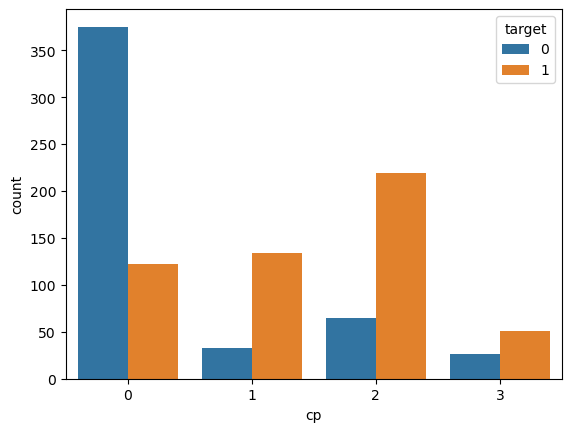

In [22]:
sns.countplot(data=df,x='cp',hue='target')

# Decision Tree

## Using grid search

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
X = df.drop('target', axis=1)

In [9]:
y = df['target']

In [12]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {
    'max_depth': [1, 3, 5]
}

In [15]:
dtree = DecisionTreeClassifier(random_state=42)

In [16]:
full_cv_classifier = GridSearchCV(dtree,param_grid,cv=5,scoring='accuracy')

In [17]:
full_cv_classifier.fit(X_cv, y_cv)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 3, 5]}, scoring='accuracy')

In [18]:
full_cv_classifier.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [19]:
pred = full_cv_classifier.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        58
           1       0.75      0.93      0.83        45

    accuracy                           0.83       103
   macro avg       0.84      0.85      0.83       103
weighted avg       0.85      0.83      0.84       103



# Titanic Dataset

AdaBoost Hyperparameter Tuning on the Titanic Dataset
o Dataset: Use the Titanic Dataset from Kaggle or seaborn library.
o Tasks:
1. Load the Titanic dataset, preprocess it (handle missing values and encode categorical variables), and split it into training and testing sets (80% train, 20% test).
2. Initialize an AdaBoost classifier with n_estimators=50 and a Decision Tree base estimator (max_depth=1).
3. Perform hyperparameter tuning on n_estimators (values: 50, 100, 150) and learning_rate (values: 0.1, 0.5, 1.0).
4. For each configuration, evaluate accuracy and F1-score on the test data.
5. Plot accuracy and F1-score for each configuration and analyze how tuning affects performance in terms of bias-variance trade-off.

In [33]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Titanic.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [35]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [36]:
df.shape

(1309, 14)

In [37]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [38]:
df['body'].unique()

array([ nan, 135.,  22., 124., 148., 208., 172., 269.,  62., 133., 275.,
       147., 110., 307.,  38.,  80.,  45., 258., 126., 292., 175., 249.,
       230., 122., 263., 234., 189., 166., 207., 232.,  16., 109.,  96.,
        46., 245., 169., 174.,  97.,  18., 130.,  17., 295., 286., 236.,
       322., 297., 155., 305.,  19.,  75.,  35., 256., 149., 283., 165.,
       108., 121.,  52., 209., 271.,  43.,  15., 101., 287.,  81., 294.,
       293., 190.,  72., 103.,  79., 259., 260., 142., 299., 171.,   9.,
       197.,  51., 187.,  68.,  47.,  98., 188.,  69., 306., 120., 143.,
       156., 285.,  37.,  58.,  70., 196., 153.,  61.,  53., 201., 309.,
       181., 173.,  89.,   4., 206., 327., 119.,   7.,  32.,  67., 284.,
       261., 176.,  50.,   1., 255., 298., 314.,  14., 131., 312., 328.,
       304.])

In [39]:
df['body'] = df['body'].fillna(df['body'].mean())

In [40]:
df['body'].isna().sum()

0

In [41]:
df['age'] = df['age'].fillna(df['age'].mean())

In [42]:
df['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [43]:
df = df.drop('cabin', axis = 1)

In [44]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [45]:
df['boat'].isna().sum()

823

In [46]:
df['boat'].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [47]:
df = df.drop('boat', axis=1)

In [48]:
df['home.dest'].unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

In [49]:
df['home.dest'].isna().sum()

564

In [50]:
df['home.dest'] = df['home.dest'].fillna(df['home.dest'].mode())

In [51]:
df['home.dest'].isna().sum()

564

In [52]:
df = df.drop('home.dest', axis=1)

In [53]:
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    2
body        0
dtype: int64

In [54]:
df = df.dropna()

In [55]:
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
body        0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   survived  1306 non-null   int64  
 2   name      1306 non-null   object 
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   int64  
 6   parch     1306 non-null   int64  
 7   ticket    1306 non-null   object 
 8   fare      1306 non-null   float64
 9   embarked  1306 non-null   object 
 10  body      1306 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 122.4+ KB


## Training and spliting data

In [57]:
X = pd.get_dummies(df.drop('survived',axis=1),drop_first=True, dtype = int)
y = df['survived']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier(max_depth = 1)

In [69]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [70]:
base_pred = model.predict(X_test)
base_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [72]:
confusion_matrix(y_test,base_pred)

array([[136,  33],
       [ 24,  69]], dtype=int64)

In [73]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       169
           1       0.68      0.74      0.71        93

    accuracy                           0.78       262
   macro avg       0.76      0.77      0.77       262
weighted avg       0.79      0.78      0.78       262



## Using Adaboost

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME')

In [76]:
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [77]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [78]:
predictions = model.predict(X_test)

In [79]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       169
           1       0.68      0.77      0.72        93

    accuracy                           0.79       262
   macro avg       0.77      0.79      0.78       262
weighted avg       0.80      0.79      0.79       262



## Grid Search

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = {'n_estimators':[50,100,150],
             'learning_rate':[0.1,0.5,1.0]}

In [83]:
model = AdaBoostClassifier(algorithm='SAMME')

In [84]:
grid = GridSearchCV(model,param_grid)

In [85]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME'),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]})

In [86]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 50}

In [87]:
predictions = grid.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       169
           1       0.68      0.77      0.72        93

    accuracy                           0.79       262
   macro avg       0.77      0.79      0.78       262
weighted avg       0.80      0.79      0.79       262



In [90]:
cm = confusion_matrix(y_test, predictions)

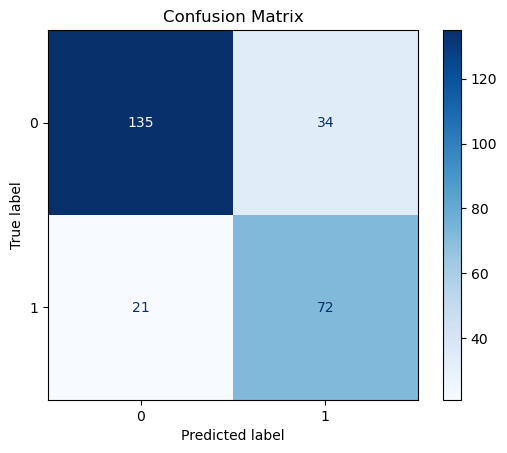

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()